In [3]:
%matplotlib inline
from pylab import *

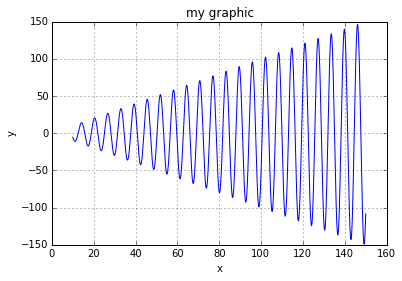

In [92]:
import scipy.integrate

def I(x):
    return sin(x)*x

def draw_simple_func():
    xs = arange(10.0, 150.0, 0.01)
    ys = [I(x) for x in xs]


    plot(xs,ys)
    grid()
    xlabel('x')
    ylabel('y')
    title('my graphic')
    show()
    
draw_simple_func()

In [32]:

def f(x):
    return x**2*tan(x)
y, err = scipy.integrate.quad(f, 0, 1)


y

0.3304268165169371

In [40]:
from scipy.stats.distributions import norm

x = norm()
x

In [159]:
mu, sigma = 0, 0.1 # mean and standard deviation

In [161]:
numpy.random.normal(mu, sigma, 10)

array([-0.06802453,  0.06536616, -0.13101885, -0.04190426,  0.04095322,
       -0.13018667, -0.05938714,  0.14540045, -0.03479561, -0.10951991])

In [158]:
s = numpy.random.normal(mu, sigma, 10000)

In [60]:
#Verify the mean and the variance:
abs(mu - np.mean(s)) < 0.01
abs(sigma - np.std(s, ddof=1)) < 0.01

True

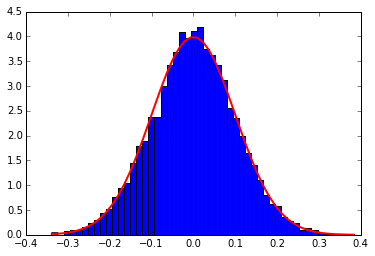

In [156]:
#Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 50, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [77]:
import random as random
import numpy
def sampleFromSalpeter(N, alpha, M_min, M_max):
    # Convert limits from M to logM.
    log_M_Min = math.log(M_min)
    log_M_Max = math.log(M_max)
    # Since Salpeter SMF decays, maximum likelihood occurs at M_min
    maxlik = math.pow(M_min, 1.0 - alpha)
    
    # Prepare array for output masses.
    Masses = []
    # Fill in array.
    while (len(Masses) < N):
        # Draw candidate from logM interval.
        logM = random.uniform(log_M_Min,log_M_Max)
        M    = math.exp(logM)
        # Compute likelihood of candidate from Salpeter SMF.
        likelihood = math.pow(M, 1.0 - alpha)
        # Accept randomly.
        u = random.uniform(0.0,maxlik)
        if (u < likelihood):
            Masses.append(M)
    return Masses

In [70]:
# Define logarithmic likelihood function.
# params ... array of fit params, here just alpha
# D      ... sum over log(M_n)
# N      ... number of data points.
# M_min  ... lower limit of mass interval
# M_max  ... upper limit of mass interval
def evaluateLogLikelihood(params, D, N, M_min, M_max):
    alpha = params[0]  # extract alpha
    # Compute normalisation constant.
    c = (1.0 - alpha)/(math.pow(M_max, 1.0-alpha)
                        - math.pow(M_min, 1.0-alpha))
    # return log likelihood.
    return N*math.log(c) - alpha*D

# Generate toy data.
N      = 1000000  # Draw 1 Million stellar masses.
alpha  = 2.35
M_min  = 1.0
M_max  = 100.0
Masses = sampleFromSalpeter(N, alpha, M_min, M_max)
LogM   = numpy.log(numpy.array(Masses))
D      = numpy.mean(LogM)*N

In [102]:
# initial guess for alpha as array.
guess = [3.0]
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsizes = [0.005]  # array of stepsizes
accepted  = 0.0

# Metropolis-Hastings with 10,000 iterations.
for n in range(10000):
    old_alpha  = A[len(A)-1]  # old parameter value as array
    old_loglik = evaluateLogLikelihood(old_alpha, D, N, M_min,
                    M_max)
    # Suggest new candidate from Gaussian proposal distribution.
    new_alpha = numpy.zeros([len(old_alpha)])
    for i in range(len(old_alpha)):
        # Use stepsize provided for every dimension.
        new_alpha[i] = random.gauss(old_alpha[i], stepsizes[i])
    new_loglik = evaluateLogLikelihood(new_alpha, D, N, M_min, M_max)
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_alpha)
        accepted = accepted + 1.0  # monitor acceptance
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_alpha)
            accepted = accepted + 1.0  # monitor acceptance
        else:
            A.append(old_alpha)

print ("Acceptance rate = "+str(accepted/10000.0))

Acceptance rate = 0.3339


Mean:  2.35002684586
Sigma: 0.00152102332344


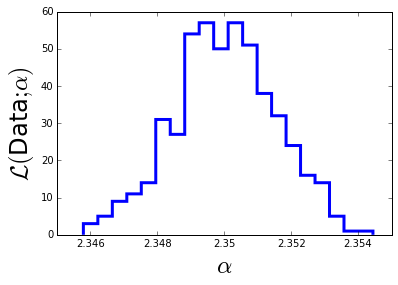

In [105]:
# Discard first half of MCMC chain and thin out the rest.
Clean = []
for n in range(5000,10000):
    if (n % 10 == 0):
        Clean.append(A[n][0])

# Print Monte-Carlo estimate of alpha.
print ("Mean:  "+str(numpy.mean(Clean)))
print ("Sigma: "+str(numpy.std(Clean)))

plt.figure(1)
plt.hist(Clean, 20, histtype='step', lw=3)
plt.xticks([2.346,2.348,2.35,2.352,2.354],
           [2.346,2.348,2.35,2.352,2.354])
plt.xlim(2.345,2.355)
plt.xlabel(r'$\alpha$', fontsize=24)
plt.ylabel(r'$\cal L($Data$;\alpha)$', fontsize=24)
plt.savefig('example-MCMC-results.png')
plt.show()

In [113]:
from numpy import ndarray
ndarray((5,),float)

array([ 0.,  0.,  0.,  0.,  0.])

In [147]:
h = 0.001
xs = arange(-10.0, 10.0, h)

In [148]:
def draw_array(array, name):
    plot(array)
    grid()
    title(name)
    show()   
    

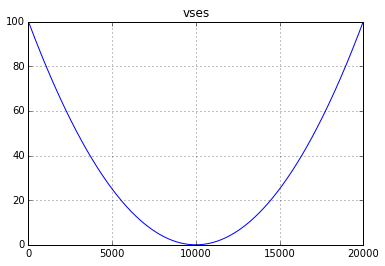

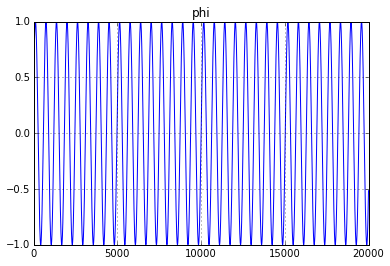

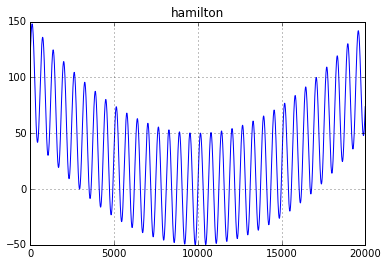

In [157]:
h_const = 1.0

def HamiltonSchrod(h, phis, m, vs):
    hs = ndarray((len(xs) - 2,),float)
    h2div2 = h_const**2/2.0
    for i_h in range(len(hs)):
        i = i_h + 1
        hs[i_h] = - (h2div2 / m)  * (phis[i-1] - 2.0*phis[i] + phis[i+1]) / (h*h) + vs[i]
        i += 1
    return hs
#vs = ndarray((len(xs),),float)
vs = [x*x for x in xs]
draw_array(vs, 'vses')

phis = [sin(10*x) for x in xs]
draw_array(phis, 'phi')

ys = HamiltonSchrod(h, phis, 1, vs)
draw_array(ys, 'hamilton')
    